<a href="https://colab.research.google.com/github/sljm12/machine_learning_notebooks/blob/master/Clustering_Articles_using_SNA_and_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is to try out the concept of using NER and SNA modularity to cluster news articles. This has some benefits we can store the news in a graph db and when we retrive we do a clustering using NER entities which can save time instead of reclustering using Text techniques.

Current speed is slow due to the NER using huggingface NER, we can switch to spacy or other NER to make it faster

In [ ]:
!pip -q install newspaper3k
!pip -q install transformers
from newspaper import Article, ArticleException
from transformers import pipeline

     |████████████████████████████████| 215kB 3.4MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 7.4MB 10.2MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 890kB 3.3MB/s 
     |████████████████████████████████| 3.0MB 18.1MB/s 
     |████████████████████████████████| 1.1MB 40.4MB/s 
     |████████████████████████████████| 890kB 38.3MB/s 


In [ ]:
nlp = pipeline("ner",grouped_entities=True)
#summarizer = pipeline("summarization")

In [ ]:
import feedparser

rss = [
       "http://rss.cnn.com/rss/edition_world.rss",
       "http://feeds.bbci.co.uk/news/world/rss.xml"
]

r_links=[]
rss_parsed = [feedparser.parse(r) for r in rss]

In [ ]:
for r in rss_parsed:
  r_links = r_links + [row["link"] for row in r["entries"]]

In [ ]:
links = r_links

In [ ]:
links = [
         "https://www.channelnewsasia.com/news/world/new-zealand-mosque-gunman-brenton-tarrant-extremism-convicted-13057534",
         "https://www.straitstimes.com/asia/australianz/new-zealand-court-sentences-mosque-shooter-brenton-tarrant-to-life-imprisonment",
         "https://www.asiaone.com/world/you-know-face-christchurch-hero-confronts-killer-court",
         "https://www.theguardian.com/commentisfree/2020/aug/27/the-christchurch-mosque-survivors-have-to-find-a-way-to-move-on-but-we-shouldnt",
         "https://www.asiaone.com/singapore/frustrated-chinese-travellers-singapore-show-limits-border-reopenings-covid-19-rages",
         "https://www.channelnewsasia.com/news/singapore/singapore-china-flights-travel-covid-19-testing-arrangements-13055952",
         "https://www.channelnewsasia.com/news/asia/japanese-prime-minister-abe-to-resign-over-health-concerns-13062124",
         "https://www.straitstimes.com/asia/east-asia/japan-pm-abe-to-resign-due-to-worsening-health-media",
         "https://sg.news.yahoo.com/japan-pm-abe-set-hold-001117526.html",
         "https://www.straitstimes.com/opinion/contemplating-abes-autumn-harvest",
         "https://www.channelnewsasia.com/news/commentary/shinzo-abe-ill-sick-replacement-japan-pm-covid-19-economy-13060036",
         "https://www.channelnewsasia.com/news/singapore/foreigner-job-competition-singaporeans-employment-pass-13068156",
         "https://www.straitstimes.com/politics/parliament-prefer-singaporeans-when-hiring-choose-citizens-over-foreigners-if-lay-offs",
         "https://www.todayonline.com/singapore/members-parliament-raise-concerns-about-competition-foreigners-jobs-first-day-debates",
         "https://www.channelnewsasia.com/news/parliament/videos/august/debate-on-president-s-address-gan-siow-huang-on-reducing-13068954",
         "https://www.straitstimes.com/politics/retain-citizens-over-foreigners-if-retrenching-gan-siow-huang",
         "https://www.thejakartapost.com/news/2020/08/26/indonesia-starts-preliminary-talks-on-travel-corridor-with-singapore.html",
         "https://www.flightglobal.com/air-transport/singapore-and-indonesia-mull-essential-travel-green-lane/139898.article",
         "https://www.straitstimes.com/politics/pm-lee-to-deliver-speech-on-spores-response-to-covid-19-in-parliament-at-330pm",
         "https://www.todayonline.com/singapore/watch-pm-lee-speaks-parliament-spores-response-pandemic-and-life-beyond-covid-19",
         "https://www.straitstimes.com/politics/pm-lees-speech-in-parliament-follow-sts-live-coverage",
         "https://www.channelnewsasia.com/news/singapore/covid-19-pm-lee-hsien-loong-parliament-errors-13075260"
]

Collect the articles and their text

In [ ]:
from pathlib import Path
c=0
t = []
for l in links:
    print(l)
    try:
      a = Article(l)
      a.download()
      a.parse()
      Path(str(c)+".txt").write_text(a.text)
      c=c+1
      t.append(a.text)
    except ArticleException:
      print(l,"cannot download")

http://rss.cnn.com/~r/rss/edition_world/~3/u038prXyPMo/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/Ra6g53euUWM/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/h7OE3S3Q8zU/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/vZVJyT2SBWQ/mulan-disney-china-credits-tapper-sotu-vpx.cnn
http://rss.cnn.com/~r/rss/edition_world/~3/Ofrh72sptT4/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/APyhk0bVh_4/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/kK_yyezxG5s/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/sVhGbsF1jlg/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/ksvwK-bd7xE/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/qx659QE0rPY/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/KlnsnygiAw8/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/pbQjkbD_bFk/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/Pa_SMoc1110/index.html
http://rss.cnn.com/~r/rss/edition_world/~3/6Drm9PPhEOo/index.html
http://rss.cnn.com/~r/rss/edition_world/

# Doing Full Article Graph

## NER

In [ ]:
def group_dict(ner):
  ner_dict = {}
  for i in ner:
    for n in i:
      group = n["entity_group"]
      if group not in ner_dict:
        ner_dict[group] = []

      if n["word"] not in ner_dict[group]:
        ner_dict[group].append(n["word"])
  return ner_dict
    
    


In [ ]:
full_articles_ner = [nlp(i) for i in t]

In [ ]:
data = []
# i refers to the article number
for i in range(len(full_articles_ner)):
  gd = group_dict([full_articles_ner[i]])
  for k in gd.keys():
    for word in gd[k]:
      data.append((i, k, word))

In [ ]:
import pandas as pd

df = pd.DataFrame(data=data)

All the entities extracted to data.csv

In [ ]:
df.to_csv("data.csv")

Extract the unique entities

In [ ]:
entity = {}

#Insert the articles as entities
for i in range(len(t)):
  entity["article"+str(i)]={
      "type": "Article",
      "value": links[i]
  }

#INsert the entities that are extracted
for (id, articleId, type_, value) in df.itertuples():
  if value not in entity.keys():
    entity[value] = {
        "type":type_,
        "value": value
    }


In [ ]:
import json
Path("entity_list.json").write_text(json.dumps(entity))

48958

In [ ]:
entity_list = []
for k,v  in entity.items():
  v["name"]=k
  entity_list.append(v)


## Save the unique entities

In [ ]:
entity_df= pd.DataFrame(data=entity_list)

In [ ]:
entity_df.to_csv("entity_list.csv")

In [ ]:
entity_df.head()

,type,value,name
0,Article,http://rss.cnn.com/~r/rss/edition_world/~3/u03...,article0
1,Article,http://rss.cnn.com/~r/rss/edition_world/~3/Ra6...,article1
2,Article,http://rss.cnn.com/~r/rss/edition_world/~3/h7O...,article2
3,Article,http://rss.cnn.com/~r/rss/edition_world/~3/vZV...,article3
4,Article,http://rss.cnn.com/~r/rss/edition_world/~3/Ofr...,article4


## Entity to ID mapping so when we create the links we can just do a look up

In [ ]:
entity_df_dict={}

for i in entity_df.itertuples():
  entity_df_dict[i[3]]=i[0]

In [ ]:
entity_df_dict

{'##A': 783,
 '##C': 475,
 '##D': 474,
 '##N': 425,
 '##NBA': 87,
 '##T': 464,
 '##Tok': 462,
 '##UDEP': 404,
 '##Y': 221,
 '##ZON PRIME VIDEO': 780,
 '##beck': 329,
 '##berstadt': 260,
 '##dsfjorden': 431,
 '##ft': 690,
 '##gram': 397,
 '##hales': 485,
 '##haus': 207,
 '##hin': 516,
 '##homaristone': 577,
 '##icus': 428,
 '##ik': 478,
 '##k': 627,
 '##lberg': 347,
 '##o': 453,
 '##ob': 650,
 '##ok': 472,
 '##pie': 342,
 '##psy': 422,
 '##ron': 90,
 '##rsk': 625,
 '##s N Cream': 267,
 '##sk': 624,
 '##ty': 737,
 '##uters': 450,
 '##vid': 154,
 '##wa': 449,
 '##worth': 714,
 '19': 155,
 '2': 443,
 '2020 US Open': 132,
 '21st Century': 536,
 '737': 356,
 'A': 239,
 'A . Law': 308,
 'ABC': 579,
 'ABC Photo Archives': 294,
 'AFP': 526,
 'AI': 568,
 'AIDS': 185,
 'AM': 779,
 'ARM': 559,
 'ARM Holdings': 562,
 'AS': 251,
 'Abe': 68,
 'Achimota School': 741,
 'Ada': 646,
 'Adam Sand': 414,
 'Adams': 131,
 'Adele': 698,
 'Aden': 493,
 'Africa': 158,
 'African': 744,
 'African American': 103,
 

## Create the edges between the articles and the entities

In [ ]:
links = [] 
for i in range(len(t)):
  entities = full_articles_ner[i]
  for e in entities:
    links.append((i, entity_df_dict[e["word"]]))

In [ ]:
links_df = pd.DataFrame(data=links, columns=["Source","Target"])

In [ ]:
links_df

,Source,Target
0,0,63
1,0,66
2,0,72
3,0,67
4,0,68
...,...,...
1455,62,811
1456,62,816
1457,62,816
1458,62,591


In [ ]:
links_df.to_csv("links.csv")

## SNA Part

In [ ]:
!pip install networkx


In [ ]:
import networkx as nx

In [ ]:
graph = nx.Graph()
for row in data:
  article = "article"+str(row[0])
  word = row[2]
  graph.add_edge(article, word)

In [ ]:
nodes_list = [(e["name"], e) for e in entity_list]
graph.add_nodes_from(nodes_list)

In [ ]:
data[0:10]

[(0, 'I-ORG', 'CNN'),
 (0, 'I-ORG', 'Liberal Democratic Party'),
 (0, 'I-ORG', 'LDP'),
 (0, 'I-PER', 'Shinzo Abe'),
 (0, 'I-PER', 'Yoshihide Suga'),
 (0, 'I-PER', 'Abe'),
 (0, 'I-PER', 'Suga'),
 (0, 'I-PER', 'Fumio Kishida'),
 (0, 'I-PER', 'Shigeru Ishiba'),
 (0, 'I-LOC', 'Japan')]

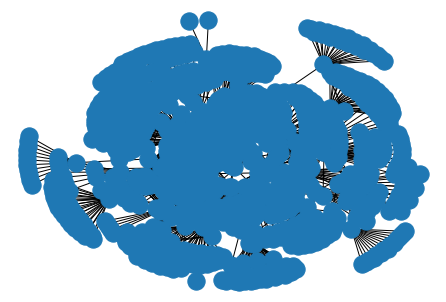

In [ ]:
nx.draw_kamada_kawai(graph)

In [ ]:
more_than_2 = [i[0] for i in graph.degree if i[1]>1]

In [ ]:
more_than_2

['article0',
 'CNN',
 'Liberal Democratic Party',
 'LDP',
 'Shinzo Abe',
 'Yoshihide Suga',
 'Abe',
 'Suga',
 'Fumio Kishida',
 'Shigeru Ishiba',
 'Japan',
 'Tokyo',
 'Japanese',
 'article1',
 'Black Lives Matter',
 'Naomi Osaka',
 'James',
 'Black',
 'W',
 'New York',
 'Florida',
 'San Francisco',
 'America',
 'article2',
 'British',
 'article4',
 'Belarusian',
 'US',
 'article5',
 'CNN Business',
 'Netflix',
 'article6',
 'China',
 'Co',
 'Chinese',
 'article7',
 'London',
 'Africa',
 'Brazil',
 'article8',
 'UK',
 'B',
 'Covid - 19',
 'article9',
 'Taiwan',
 'Beijing',
 'anti',
 'article10',
 'Americans',
 'article11',
 'article12',
 'German',
 'article13',
 'article14',
 'Los Angeles',
 'L',
 'A',
 'French',
 'article15',
 'Getty Images',
 'American',
 'Germany',
 'article16',
 'Ghana',
 'Nigeria',
 'Nigerian',
 'article17',
 'S',
 'West Coast',
 'article18',
 'article19',
 'Zoe',
 'E',
 'Williams',
 'Australia',
 'article20',
 'Microsoft',
 'Boeing',
 'Bond',
 'Bo',
 'article21',


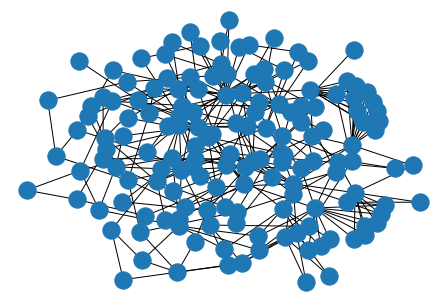

In [ ]:
sg =nx.subgraph_view(graph,lambda x : True if x in more_than_2 else False)
nx.draw_kamada_kawai(sg)

In [ ]:
## clustering usng Modularity

## Draw the graph with the modularity class applied

In [ ]:
mods = nx.algorithms.community.modularity_max.greedy_modularity_communities(sg)

For each node, check if the node in is which mod class and append the color base on the array position of the modularity class

In [ ]:
color = []
for i in sg.nodes:
  for n in range(len(mods)):
    if i in mods[n]:
      color.append(n)

networkx only can put in labels that are in the graph. So we filter away the names that are not in the "sg" subgraph. We only want to show the nodes that are labeled "Article"

In [ ]:
labels = {}

for i in entity_list:
  if i["name"] in more_than_2:
    labels[str(i["name"])] = i["name"] if i["type"] == "Article" else ""

In [ ]:
labels["article0"]

'article0'

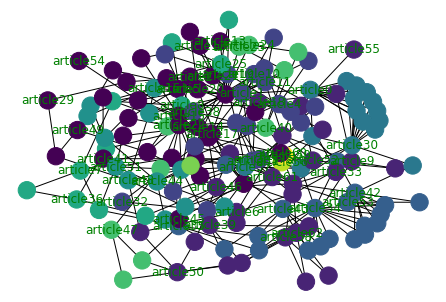

In [ ]:
nx.draw_kamada_kawai(sg, node_color = color, labels = labels, font_color = 'g')

In [ ]:
len(mods)

11

In [ ]:
nx.readwrite.gml.write_gml(sg, "test.gml")

In [ ]:
nx.readwrite.gml.write_gml(graph, "everything.gml")

In [ ]:
for i in  mods:
  print(i)

frozenset({'Los Angeles', 'Donald Trump', 'article5', 'article41', 'French', 'article22', 'Netflix', 'American', 'Boeing', 'article45', 'article20', 'Germany', 'Microsoft', 'article13', 'British', 'article54', 'United States', 'London', 'article14', 'article29', 'S', 'New York', 'Bond', 'German', 'article60', 'BBC News', 'article49', 'CNN', 'article2', 'article17', 'article12', 'article15', 'L', 'article21'})
frozenset({'James', 'article58', 'UK', 'Taiwan', 'article52', 'anti', 'article50', 'India', 'Co', 'article6', 'China', 'Beijing', 'The Boss', 'article33', 'article9', 'Indian', 'article46', 'article18', 'Chinese', 'South', 'BBC', 'article55', 'Delhi', 'Kerala', 'article61', 'Covid - 19', 'article39', 'article62'})
frozenset({'Zoe', 'article57', 'Williams', 'article4', 'article10', 'America', 'African', 'article1', 'Australia', '##T', 'Black', 'article38', 'article19', 'Florida', 'US', 'Naomi Osaka', 'article32', 'Americans', 'Black Lives Matter', 'article11', 'article31'})
frozens

In [ ]:
for i in mods:
    print([graph.nodes[str(k)]["value"] for k in i if graph.nodes[str(k)]["type"] == "Article"])

['http://rss.cnn.com/~r/rss/edition_world/~3/APyhk0bVh_4/index.html', 'https://www.bbc.co.uk/news/election-us-2020-54026017', 'http://rss.cnn.com/~r/rss/edition_world/~3/ZN45DjYVf7s/index.html', 'https://www.bbc.co.uk/news/world-latin-america-53985284', 'http://rss.cnn.com/~r/rss/edition_world/~3/ENJl769ZOO4/index.html', 'http://rss.cnn.com/~r/rss/edition_world/~3/6Drm9PPhEOo/index.html', 'https://www.bbc.co.uk/news/world-us-canada-54138676', 'http://rss.cnn.com/~r/rss/edition_world/~3/9iYby5I01so/index.html', 'https://www.bbc.co.uk/news/science-environment-54127279', 'https://www.bbc.co.uk/news/world-us-canada-54105476', 'https://www.bbc.co.uk/news/entertainment-arts-54075088', 'http://rss.cnn.com/~r/rss/edition_world/~3/h7OE3S3Q8zU/index.html', 'http://rss.cnn.com/~r/rss/edition_world/~3/HdIbLfFJnSw/index.html', 'http://rss.cnn.com/~r/rss/edition_world/~3/Pa_SMoc1110/index.html', 'http://rss.cnn.com/~r/rss/edition_world/~3/BIhyBkoxn_g/index.html', 'http://rss.cnn.com/~r/rss/edition_w

In [ ]:
sg.degree

DegreeView({'article0': 4, 'India': 3, 'Mumbai': 2, 'CNN': 21, 'Indian': 3, 'article1': 10, 'Twitter': 2, 'World Health Organization': 2, 'WHO': 2, 'Covid - 19': 7, 'Canadian': 3, 'Co': 4, 'Canada': 2, 'United States': 6, 'US': 14, 'article2': 5, 'Christiane Amanpour': 2, 'Svetlana Tikhanovskaya': 2, 'Alexander Lukashenko': 2, 'Belarus': 2, 'article3': 7, 'Reuters': 5, 'Venezuela': 2, 'G': 4, 'article4': 13, 'Washington': 4, 'Ukraine': 2, 'Kiev': 2, 'West': 3, 'Europe': 4, 'German': 4, 'Russian': 3, 'article5': 3, 'China': 9, 'Chinese': 5, 'article6': 5, 'Hong Kong': 2, 'CNN Business': 3, 'article7': 4, 'London': 5, 'UK': 3, 'article8': 3, 'Africa': 3, 'article9': 5, 'Beijing': 3, 'anti': 2, 'article10': 3, 'Americans': 2, 'article11': 3, 'article12': 2, 'article13': 4, 'Getty Images': 11, 'S': 2, 'article14': 6, 'American': 2, 'Germany': 4, 'New York': 2, 'article15': 2, 'W': 2, 'article16': 4, 'E': 2, 'Berlin': 2, 'article17': 4, 'article18': 3, 'article19': 7, 'California': 4, 'Dona

In [ ]:
[i for i in graph.degree if i[0].startswith('article')]

[('article0', 24),
 ('article1', 18),
 ('article2', 6),
 ('article3', 15),
 ('article4', 31),
 ('article5', 12),
 ('article6', 11),
 ('article7', 21),
 ('article8', 9),
 ('article9', 13),
 ('article10', 8),
 ('article11', 16),
 ('article12', 8),
 ('article13', 44),
 ('article14', 23),
 ('article15', 16),
 ('article16', 27),
 ('article17', 42),
 ('article18', 13),
 ('article19', 22),
 ('article20', 23),
 ('article21', 10),
 ('article22', 30),
 ('article23', 7),
 ('article24', 11),
 ('article25', 8),
 ('article26', 21),
 ('article27', 17),
 ('article28', 10),
 ('article29', 12),
 ('article30', 23),
 ('article31', 13),
 ('article32', 10),
 ('article33', 13),
 ('article34', 18),
 ('article35', 29),
 ('article36', 27),
 ('article37', 18),
 ('article38', 12),
 ('article39', 15),
 ('article40', 17),
 ('article41', 23),
 ('article42', 21),
 ('article43', 26),
 ('article44', 1),
 ('article45', 5),
 ('article46', 5),
 ('article47', 8),
 ('article48', 5)]

In [ ]:
t[20]

'We have been experiencing some problems with subscriber log-ins and apologise for the inconvenience caused. Until we resolve the issues, subscribers need not log in to access ST Digital articles. But a log-in is still required for our PDFs.'